<a href="https://colab.research.google.com/github/Cheeku1998/DNN-Models/blob/main/Churn_data_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.drop(['RowNumber',	'CustomerId',	'Surname'],axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#label encode object Datatypes
data_types_dict = dict(data.dtypes)
#keep track mappings column name to LabelEncoder
Label_encoder_collection={}
for col_name, data_type in data_types_dict.items():
    if data_type=='object':
       le=LabelEncoder()
       data[col_name]=le.fit_transform(data[col_name])
       Label_encoder_collection[col_name]=le

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [ ]:
X=data.iloc[:,:-1].values.astype(np.float32)
Y=data.iloc[:,-1].values.astype(int)


In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
#start your model with sequential object which is used to connect all hidden layers
model=tf.keras.models.Sequential()
#next add in your input object and specify the dimension you want to pass in case of predictive modelling the number of columns are passed
model.add(tf.keras.Input(shape=13))
#add in your 1st layer
model.add(tf.keras.layers.Dense(32))
#2nd layer
model.add(tf.keras.layers.Dense(32))
#Final sigmoid layer to predict (0/1)
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
#print summary to understand your NN flow
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#create your optimizer and compile your model
Optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model.fit(Xtrain,Ytrain,validation_data=(Xtest,Ytest),epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 3ms/step - loss: 44183.7969 - accuracy: 0.6733 - val_loss: 38030.3047 - val_accuracy: 0.8020
Epoch 2/20
250/250 [==============================] - 1s 3ms/step - loss: 37319.5664 - accuracy: 0.6733 - val_loss: 16494.9277 - val_accuracy: 0.8020
Epoch 3/20
250/250 [==============================] - 1s 3ms/step - loss: 21179.9492 - accuracy: 0.6823 - val_loss: 5433.0112 - val_accuracy: 0.8020
Epoch 4/20
250/250 [==============================] - 1s 3ms/step - loss: 27096.9473 - accuracy: 0.6776 - val_loss: 12000.3096 - val_accuracy: 0.8020
Epoch 5/20
250/250 [==============================] - 1s 3ms/step - loss: 33938.7695 - accuracy: 0.6783 - val_loss: 46891.2578 - val_accuracy: 0.8020
Epoch 6/20
250/250 [==============================] - 1s 3ms/step - loss: 28356.9648 - accuracy: 0.6760 - val_loss: 11905.8027 - val_accuracy: 0.8020
Epoch 7/20
250/250 [==============================] - 1s 3ms/step - loss: 23776.2441 - accuracy: 0.67

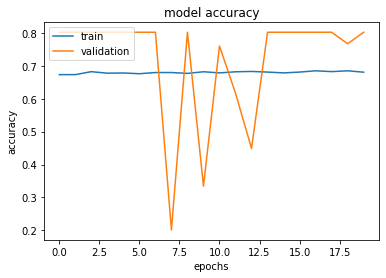

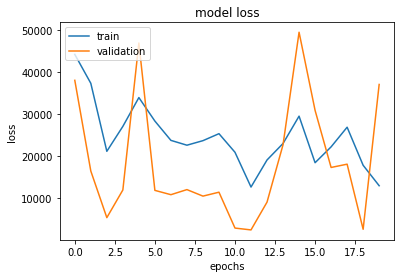

In [ ]:
#accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper left')
plt.show()

In [ ]:
#collect predictions
predictions=np.round(model.predict(Xtest))

63/63 [==============================] - 0s 1ms/step


In [ ]:
#check accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(Ytest,predictions)

0.802